In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import animation

In [2]:
def count_neighbors(A):
    ''' This function takes in an array of ones and zeros, 
    and returns an array of the same shape with how many 
    cardinal neighbors each position has.
    '''
    # Determine the number of neighbors in each direction
        # Yes if my neighbor is greater than me, or equal to me when I'm alive.
    left_neigh = np.roll(A,1,axis=0) # Yes if my neighbor is alive.
    right_neigh = np.roll(A,-1,axis=0)
    up_neigh = np.roll(A,-1,axis=1)
    down_neigh = np.roll(A,1,axis=1)
    
    up_left_neigh = np.roll(np.roll(A, 1, axis=1), 1, axis=0)
    up_right_neigh = np.roll(np.roll(A, -1, axis=1), 1, axis=0)
    down_left_neigh = np.roll(np.roll(A, 1, axis=1), -1, axis=0)
    down_right_neigh = np.roll(np.roll(A, -1, axis=1), -1, axis=0)
    
    # Sum them up and return the array
    sum_neigh = left_neigh + right_neigh + up_neigh + down_neigh + up_left_neigh + up_right_neigh + down_left_neigh + down_right_neigh
    return sum_neigh

In [3]:
def get_new_state(A):
    # Get an array of neighbor count for each position
    B = count_neighbors(A)

    # These are the positions to bring to life
    Birth = (B == 3)*~A.astype(bool)
    
    # These are the positions to keep alive
    Live = ((B==2) + (B==3))*A.astype(bool)
    
    # Combine them
    return (Birth + Live).astype(int)

In [15]:
def generate_next_board(arr):
    count_arr = count_neighbors(arr)
    return np.logical_or((count_arr==3), np.logical_and(count_arr==2, arr)).astype(int)

### Defining our starting frame A

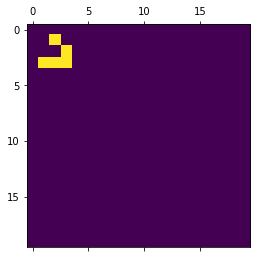

In [5]:
A = np.zeros(shape=(20,20))

A[1,2] = 1
A[2,3] = 1
A[3,1:4]=1


plt.matshow(A)

In [35]:
def generate_series(A, n_frames, filename):
    
    # First add in the first element
    state_list = [A]
    
    # Iterate over the number of frames
    for frame in range(n_frames):
        state_list.append(generate_next_board(state_list[frame]))
        
    # 
    mpl.rc('animation', html='jshtml')
    fig, ax = plt.subplots()
    plt.close()
    #ims = onp.random.uniform(0, 1, size=[5, 28, 28])
    ims = state_list #MNIST_IMAGES[:5]
    ims = [[ax.imshow(im, animated=True)] for im in ims]
    anim = mpl.animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=100)
    anim.save(f"gifs/{filename}", writer='imagemagick')
    return anim

In [6]:
B = count_neighbors(A)

In [10]:
A1 = get_new_state(A)

In [16]:
C = generate_next_board(A)

### Unbounded growth

In [32]:
%%time
unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]
X = np.zeros((30, 40))
X[15:20, 18:23] = unbounded

generate_series(X, 250, "unbounded-250.gif")

CPU times: user 16.1 s, sys: 426 ms, total: 16.5 s
Wall time: 40.9 s


### Gospel Gun

In [36]:
%%time
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.zeros((50, 70))
X[1:10,1:37] = glider_gun
generate_series(X, 250, "gospel_gun-250.gif")